## Task

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

#### importing important libraries

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data preprocessing

In [300]:
data = pd.read_csv('bigdatamart_Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [301]:
data.shape

(8523, 12)

In [302]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Observation
- Item_Identifier - it is of no use we will drop it in furthur steps

- Item_Weight -  This column is having nan values we can impute by mean in this column or by any imputer so its good to drop this column we cant see any coorelation directly with this column.


- Item_Fat_Content -  it can have an impact on sales so we will keep it

- Item_Visibility - it can have an impact on sales so we will keep it


- Item_Type - it is of no use we will drop it in furthur steps


- Item_MRP - it can have an impact on sales so we will keep it


- Outlet_Identifier -  it is of no use we will drop it in furthur steps


- Outlet_Establishment_Year - it is of no use we will drop it in furthur steps

- Outlet_Size - it can have an impact on sales so we will keep it


- Outlet_Location_Type  - it can have an impact on sales so we will keep it


- Outlet_Type- it is of no use we will drop it in furthur steps


- Item_Outlet_Sales - it can have an impact on sales so we will keep it


In [306]:
data.shape

(8523, 12)

In [307]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [308]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- ##### we have to change LF and lowfat as Low Fat and reg as Regular and then encode it by ordinal encoder

In [309]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [310]:
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

- #### Outlet_size is very sensitive data so nan values will be droped directly. remaning will be change by ordinal encoder

In [311]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [312]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [313]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [314]:
# Getting the first two characters of ID to separate them into different categories

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Food              6125
Non_Consumable    1599
Drinks             799
Name: Item_Identifier, dtype: int64

- ##### Outlet_Location_type will be change by ordinal encoder

#### Filling nan values by fillna method we have also done it by knn imputer but R2score is less so we have done it by fillna  

In [315]:
data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [316]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Food,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,Non_Consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [317]:
data.shape

(8523, 12)

In [318]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Item_fat_content : LF and low fat as Low fat and reg as regular

In [319]:
col = []
for i in (data['Item_Fat_Content']):    
    if i == 'reg': 
        col.append('Regular')
    elif i == 'low fat':
        col.append('Low Fat')
    elif i == 'LF':
        col.append('Low Fat')
    elif i == 'Low Fat':
        col.append('Low Fat')
    else:
        col.append('Regular')
data['Item_Fat_Content'] = col

In [320]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [321]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Food,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,Non_Consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### for outlet establishment year we have to change it how many years it has been opened

In [322]:
col_year= []
for i in data['Outlet_Establishment_Year']:
    col_year.append(2013-i)
data['Outlet_Establishment_Year'] = col_year

In [323]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,Food,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,15,Medium,Tier 3,Grocery Store,732.3800
4,Non_Consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052


#### encoding it by Label encoder,

In [324]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,Food,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,15,Medium,Tier 3,Grocery Store,732.3800
4,Non_Consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052


In [325]:
from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,284,0,664,4,5592,9,4,1,0,1,2540
1,0,57,1,880,14,473,3,0,1,2,2,422
2,1,376,0,715,10,2901,9,4,1,0,1,1639
3,1,393,1,0,6,4227,0,5,1,2,0,670
4,2,265,0,0,9,627,1,7,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,125,0,3912,13,4955,1,7,0,2,1,2047
8519,1,233,1,3278,0,2023,7,3,1,1,1,516
8520,2,299,0,2302,8,1263,6,2,2,1,1,1018
8521,1,149,1,7175,13,1857,3,0,1,2,2,1466


In [326]:
data = pd.get_dummies(data)

In [327]:
data.shape

(8523, 46)

In [328]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non_Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,3735.1380,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,443.4228,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,14,2097.2700,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,15,732.3800,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,26,994.7052,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0


#### now our data looks good to proceed ahead 

### EDA(Exploratory data analysis)

In [329]:
import warnings
warnings.filterwarnings('ignore')

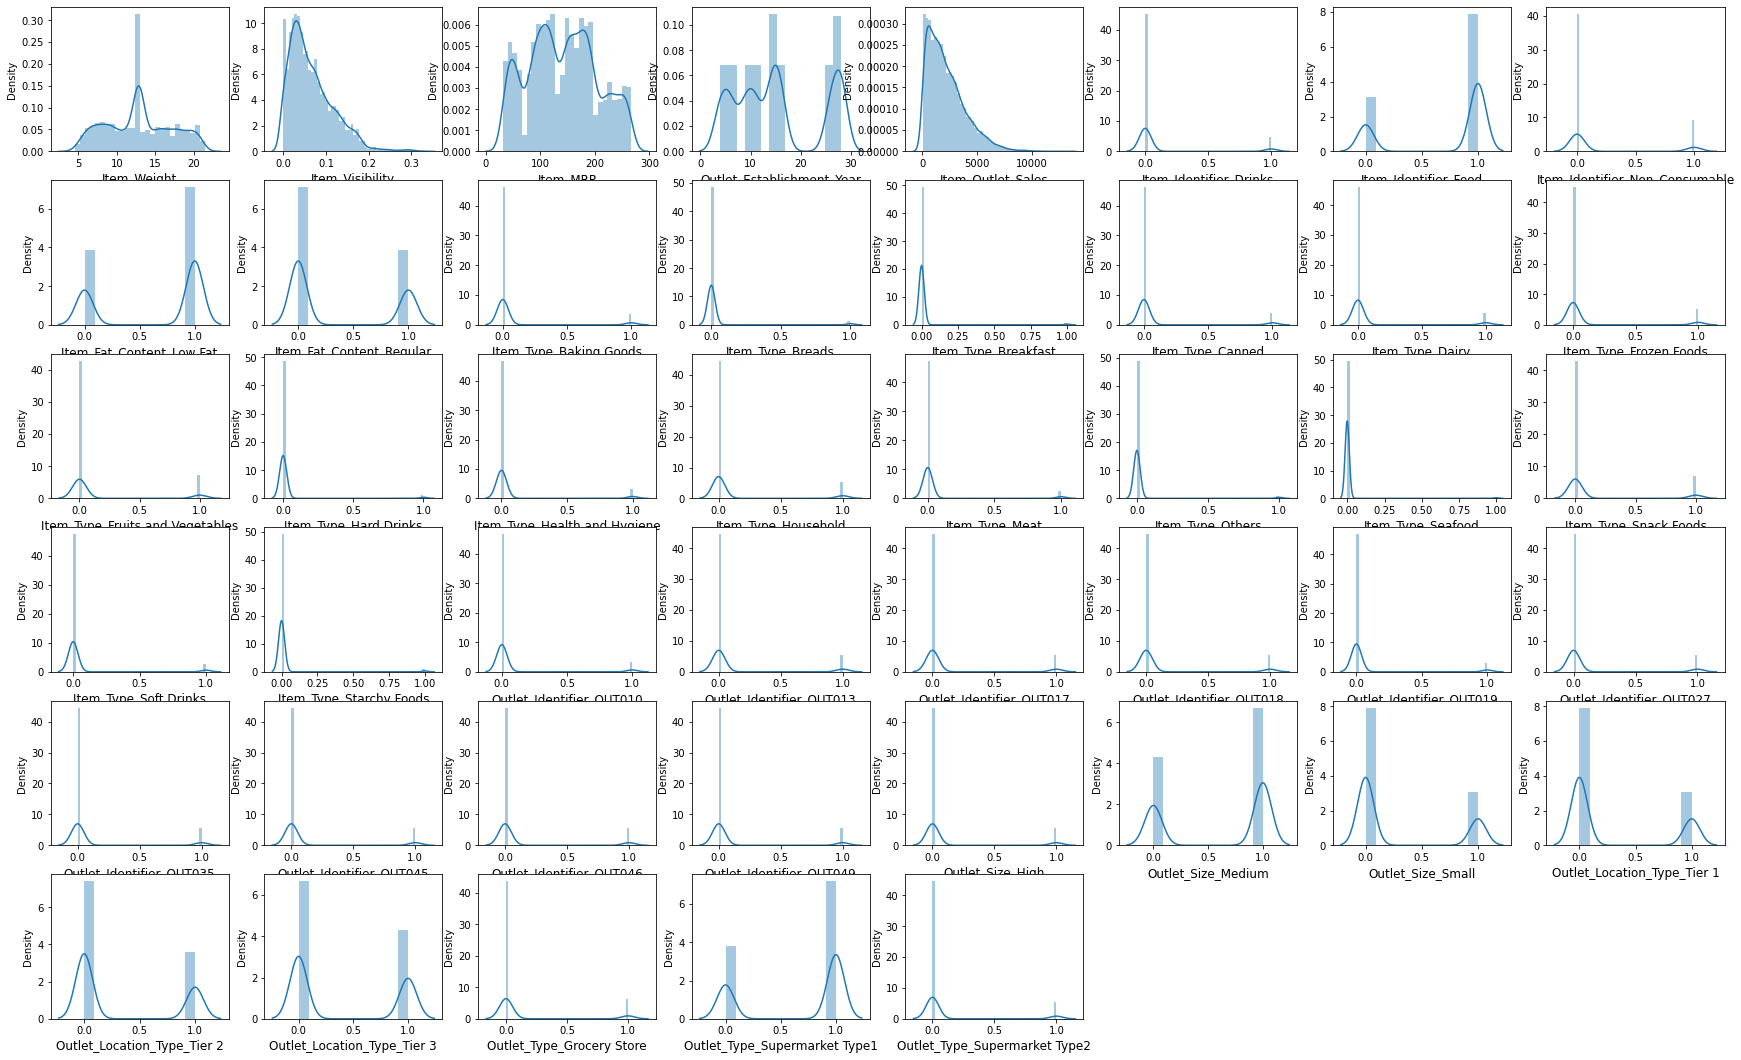

In [330]:
plt.figure(figsize=(30,25))
plotnumber = 1

for column in data:
    if plotnumber < 46:
        ax = plt.subplot(8,8,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=12)
    plotnumber +=1
plt.show()

#### observation

- Item_Fat_Content -  It is categorical data no use of seeing it in distribution

- ###### - Item_Visibility - This column is having skewness should be corrected using transformer(right skewed)

- ###### - Item_MRP - This column is having skewness should be corrected using transformer(peek correction)


- Outlet_Size - It is categorical data no use of seeing it in distribution


- Outlet_Location_Type  - It is categorical data no use of seeing it in distribution

- ###### - Item_Outlet_Sales - it can have an impact on sales so we will keep it.


In [331]:
data.corr()['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales                  1.000000
Item_MRP                           0.567574
Outlet_Type_Supermarket Type3      0.311192
Outlet_Identifier_OUT027           0.311192
Outlet_Type_Supermarket Type1      0.108765
Outlet_Size_Medium                 0.075154
Outlet_Location_Type_Tier 2        0.058261
Outlet_Identifier_OUT035           0.052823
Outlet_Establishment_Year          0.049135
Outlet_Location_Type_Tier 3        0.046376
Outlet_Identifier_OUT049           0.034264
Outlet_Identifier_OUT017           0.032610
Item_Identifier_Food               0.031905
Item_Type_Fruits and Vegetables    0.025950
Outlet_Size_High                   0.024170
Outlet_Identifier_OUT013           0.024170
Item_Type_Snack Foods              0.022782
Outlet_Identifier_OUT046           0.019803
Item_Fat_Content_Regular           0.018719
Item_Type_Household                0.015701
Item_Type_Starchy Foods            0.015039
Item_Weight                        0.011550
Item_Type_Dairy                 

<AxesSubplot:title={'center':'Correlation with sales'}>

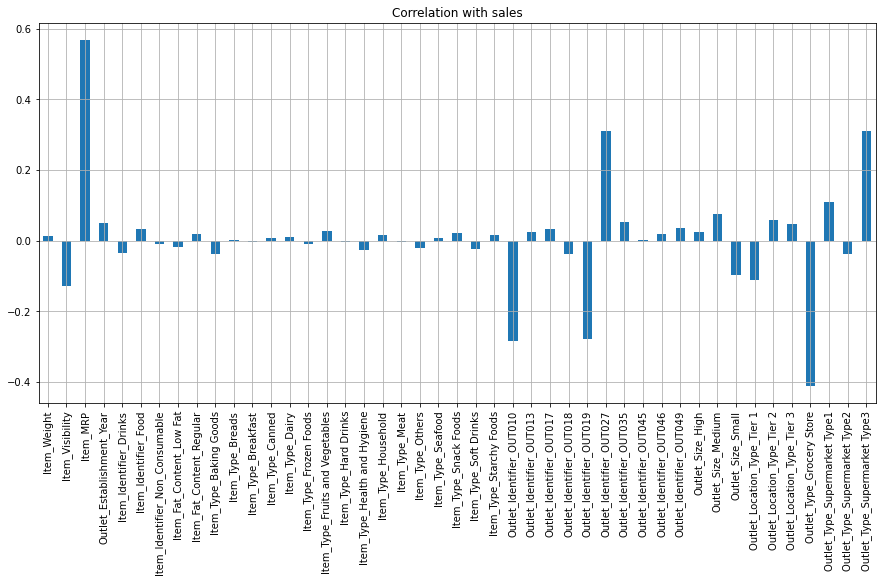

In [332]:
# visualize the correlation
data.drop('Item_Outlet_Sales', axis =1).corrwith(data['Item_Outlet_Sales']).plot(kind ='bar',grid = True, figsize = (15,7),
                                                   title = 'Correlation with sales')

##### As we can see by this,
- Item_MRP column - having very good corelation

- Outlet_Size and Outlet_Location_Type column - having good corelation

- Item_Visibilty - having negative good relation 

- Item_Fat_Content column - having week among all other columns.

<function matplotlib.pyplot.show(close=None, block=None)>

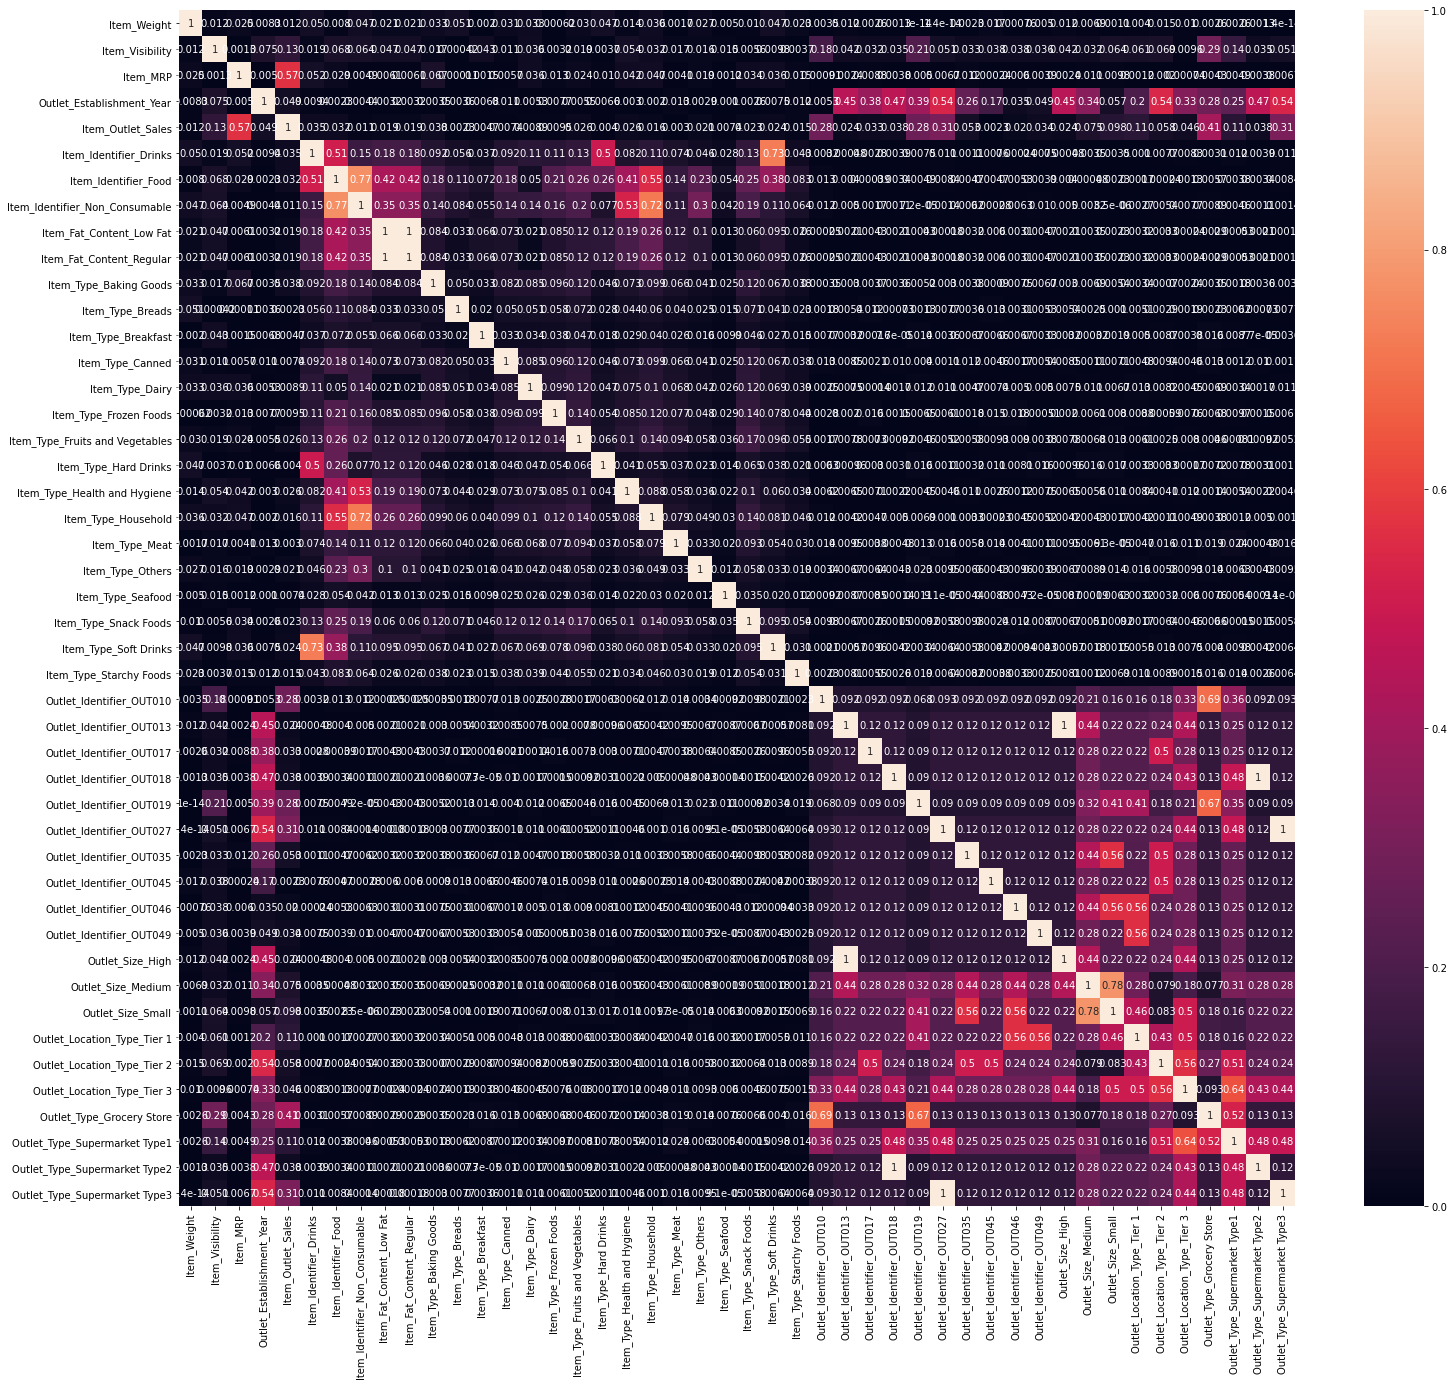

In [333]:
### plotting heatmap
plt.figure(figsize=(25,22))
sns.heatmap(abs(data.corr()),annot=True)
plt.show

##### - for multicolinearity we will check vif value too but by heat map we can see that there would not be any problem of multicolinearity

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

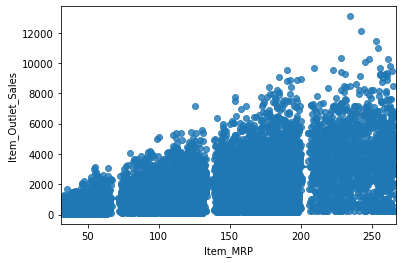

In [334]:
sns.regplot(y='Item_Outlet_Sales',x='Item_MRP',data=data)

#### there seems to have no trends in features and target

#### Checking for outliers

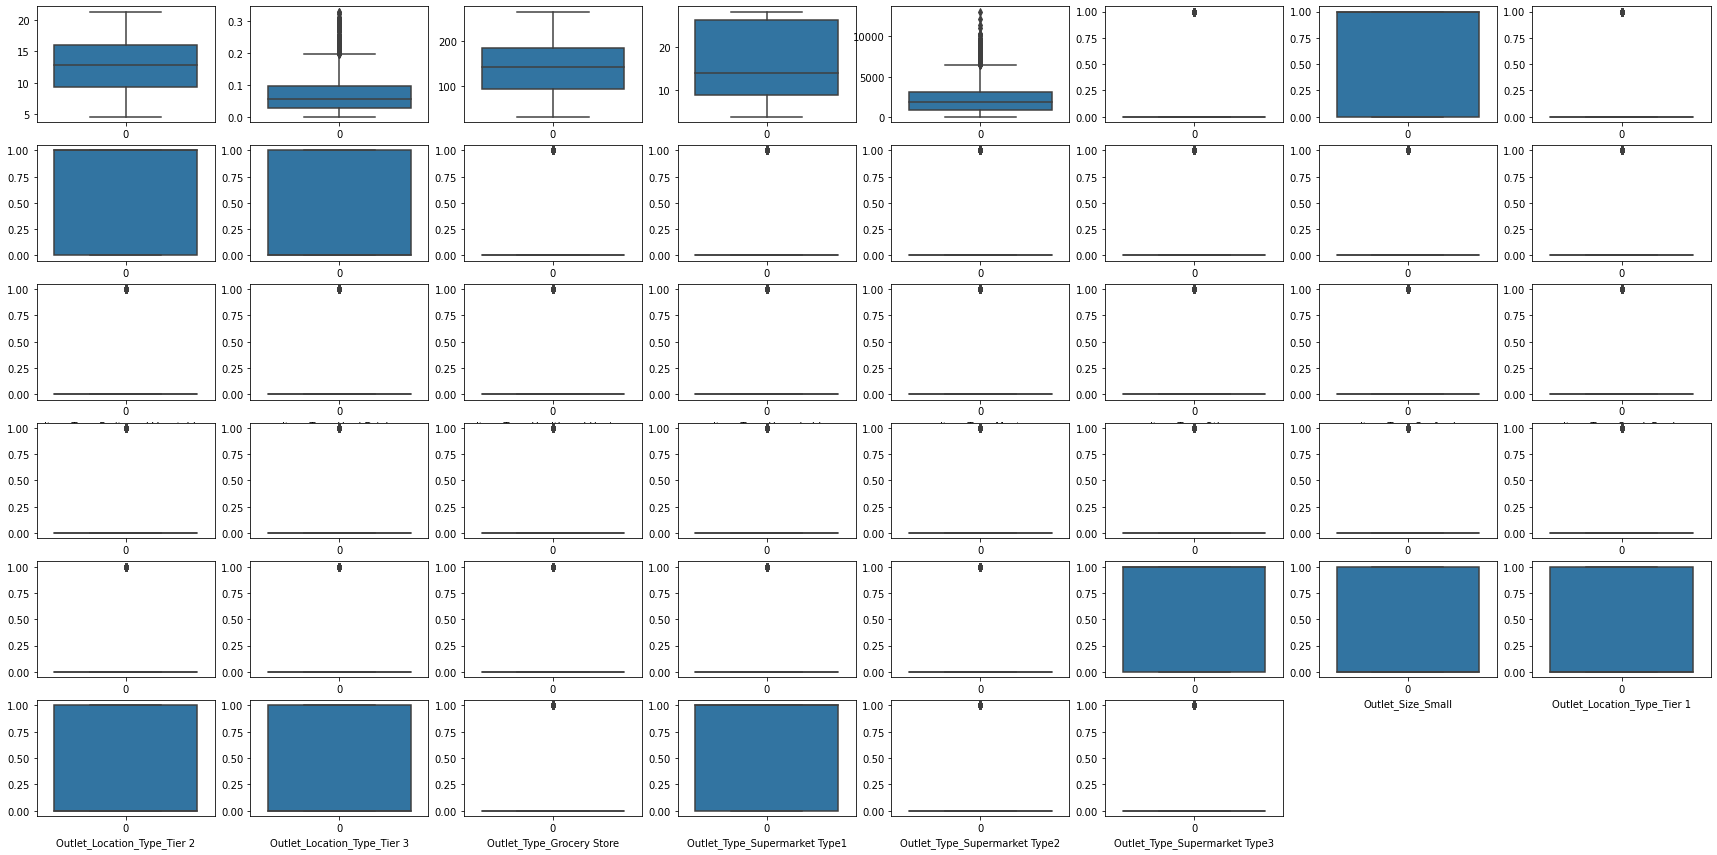

In [335]:
plt.figure(figsize=(30,20))
graph=1

for column in data:
    if graph<=46:
        ax=plt.subplot(8,8,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

#### -  There seems to have outliers,we will remove outliers by IQR after power transforming it.

### Data normalization
##### Removing skewness(power transformer)

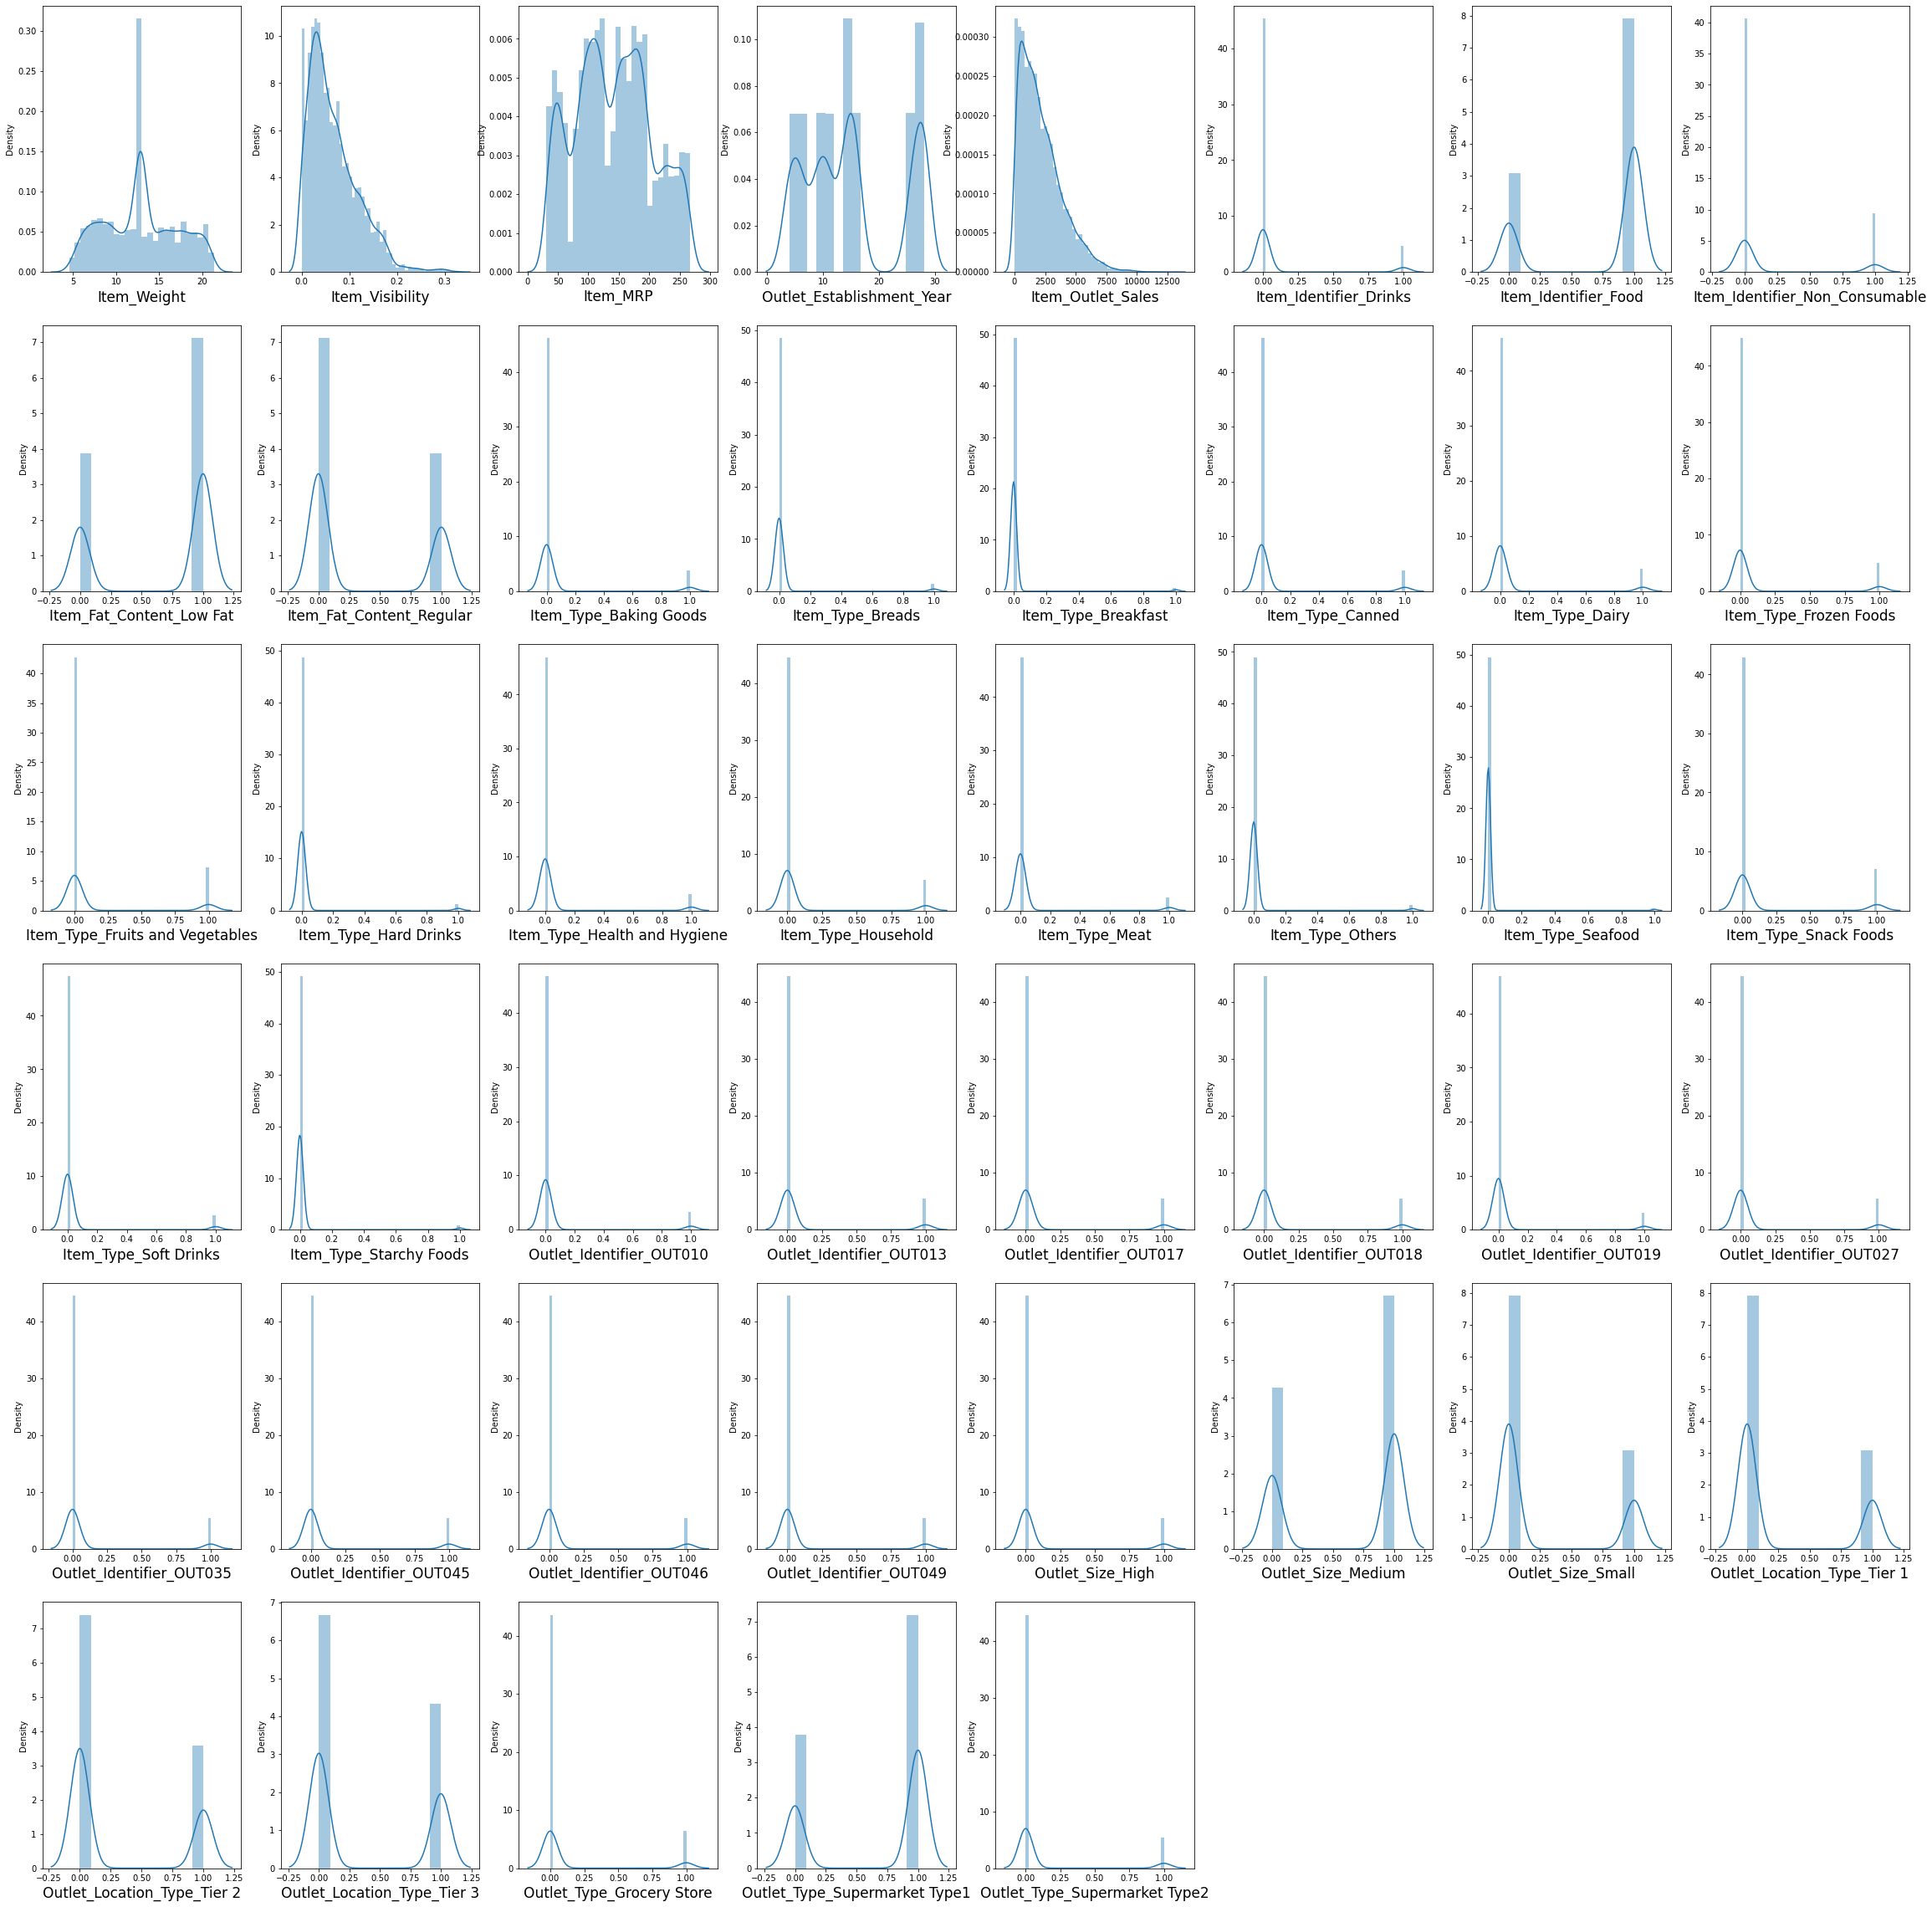

In [336]:
plt.figure(figsize=(40,55))
plotnumber = 1
for column in data:
    if plotnumber < 46:
        ax = plt.subplot(8,8,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=17)
    plotnumber +=1
plt.show()

### Removing Outliers(IQR-Inter quantile range)

In [337]:
#quantile 1
q1=data.quantile(0.25)
#QUANTILE 3
q3=data.quantile(0.75)

IQR=q3-q1
IQR

Item_Weight                           6.690000
Item_Visibility                       0.067596
Item_MRP                             91.817200
Outlet_Establishment_Year            17.000000
Item_Outlet_Sales                  2267.049000
Item_Identifier_Drinks                0.000000
Item_Identifier_Food                  1.000000
Item_Identifier_Non_Consumable        0.000000
Item_Fat_Content_Low Fat              1.000000
Item_Fat_Content_Regular              1.000000
Item_Type_Baking Goods                0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Oth

#### Outfiers detection formula
##### higherside==> Q3+(1.5*IQR)
##### lowerside==>Q3 -(1.5*IQR)

In [338]:
itv_high=(q3.Item_Visibility+1.5*IQR.Item_Visibility)
print(itv_high)
index = np.where(data['Item_Visibility']>itv_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

0.195979015
(8379, 46)


,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non_Consumable,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,9.300,0.016047,249.8092,14,3735.1380,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
1,1,5.920,0.019278,48.2692,4,443.4228,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,2,17.500,0.016760,141.6180,14,2097.2700,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
3,3,19.200,0.000000,182.0950,15,732.3800,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,4,8.930,0.000000,53.8614,26,994.7052,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8374,8518,6.865,0.056783,214.5218,26,2778.3834,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
8375,8519,8.380,0.046982,108.1570,11,549.2850,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
8376,8520,10.600,0.035186,85.1224,9,1193.1136,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
8377,8521,7.210,0.145221,103.1332,4,1845.5976,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [339]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non_Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,3735.1380,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,443.4228,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,14,2097.2700,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,15,732.3800,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,26,994.7052,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0


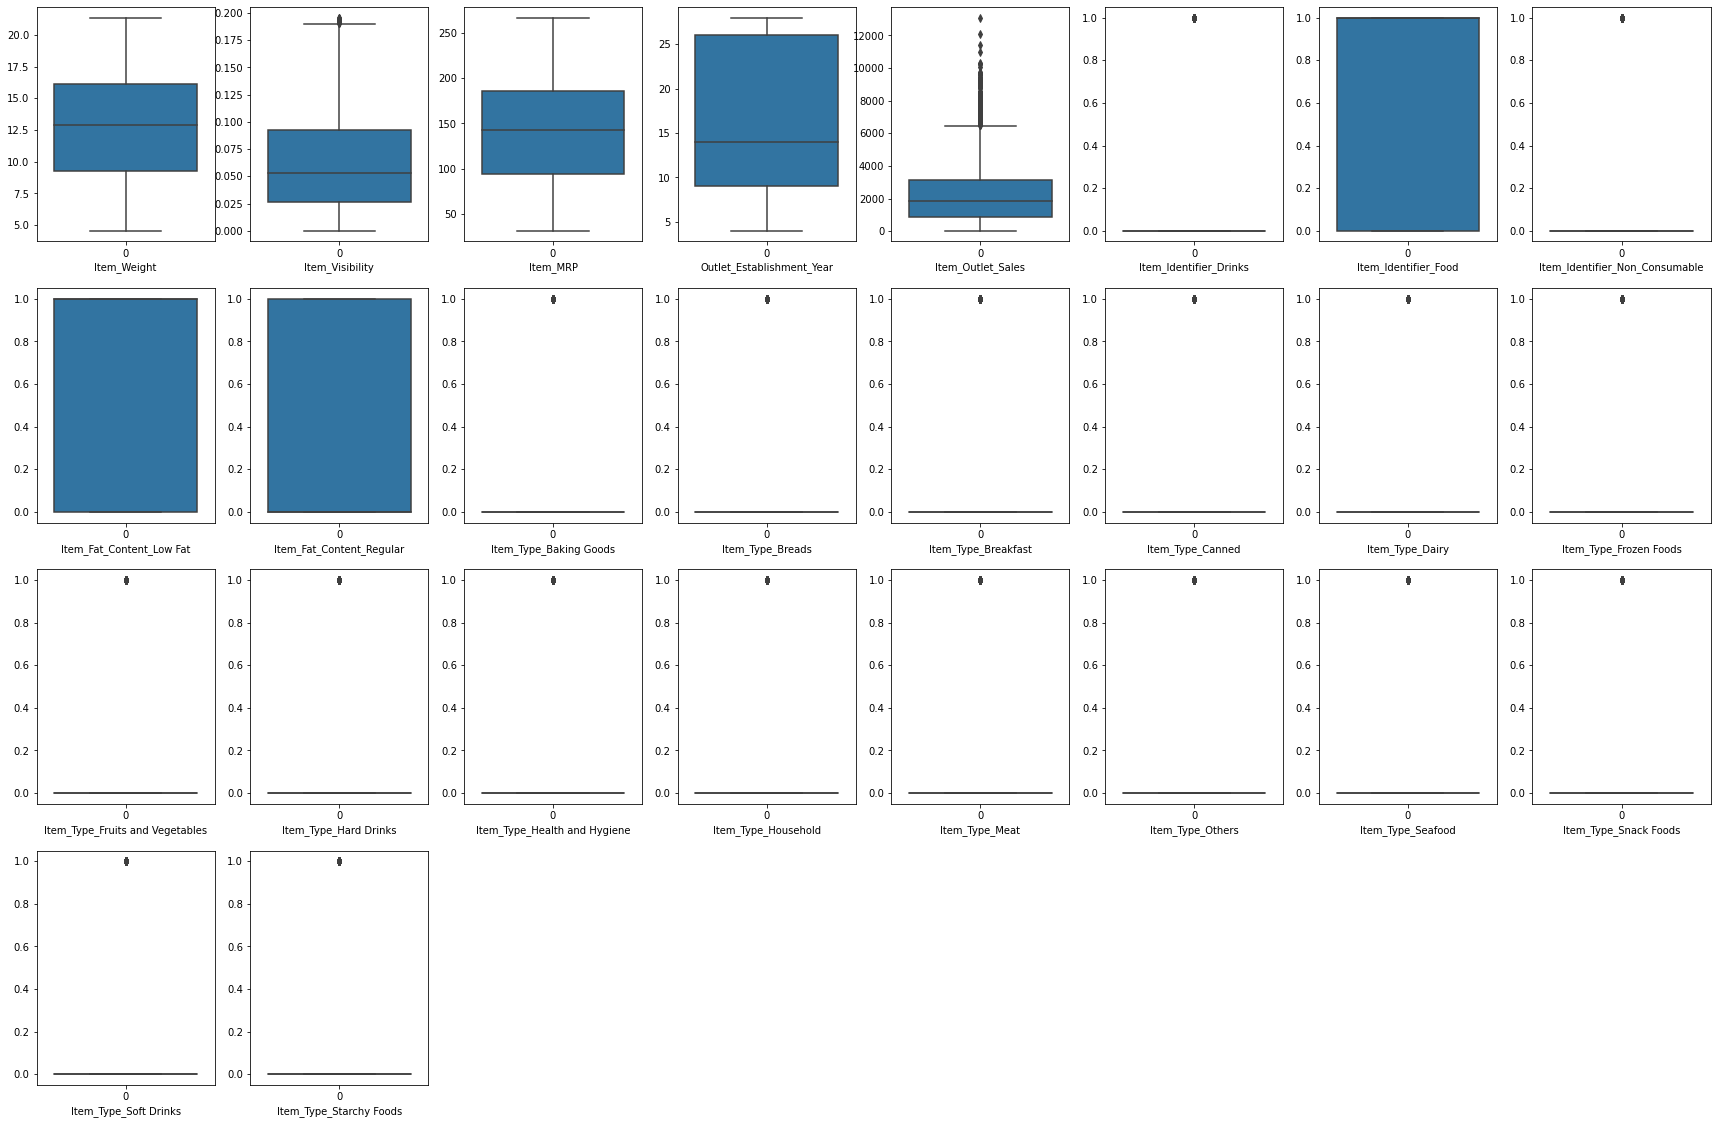

In [340]:
plt.figure(figsize=(30,25))
graph=1

for column in data:
    if graph<=26:
        ax=plt.subplot(5,8,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

#### OUTLIERS are removed and now we can good to proceed ahead,

### Data Standardization and checking vif values

In [341]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non_Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,3735.1380,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,443.4228,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,14,2097.2700,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,15,732.3800,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,26,994.7052,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0


In [342]:
X = data.drop(columns = ['Item_Outlet_Sales'],axis=1)
y = data['Item_Outlet_Sales']

In [343]:
from sklearn.preprocessing import StandardScaler

In [344]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[1]

array([-1.63724716, -0.94919036, -1.48870156, -1.32322626,  3.10157571,
       -1.59277601, -0.48206547, -1.35765622,  1.35765622, -0.28537759,
       -0.17464408, -0.11319348, -0.28708586, -0.2948074 , -0.33490031,
       -0.41043426, -0.16072497, -0.25617144, -0.34624808, -0.2291418 ,
       -0.14260468, -0.08563582, -0.40505969,  4.25282969, -0.13176797,
       -0.24868174, -0.35376697, -0.35248443,  2.83356574, -0.23850992,
       -0.35440727, -0.35333974, -0.35312602, -0.35333974, -0.35333974,
       -0.35376697,  0.7946227 , -0.61713075, -0.61713075, -0.7055883 ,
        1.24588876, -0.35526001, -1.41080262,  2.83356574, -0.35440727])

#### Checking for variance influence factor(vif) 

In [345]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [346]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

# lets check the vif
vif

,vif,Features
0,1.014509,Item_Weight
1,1.036593,Item_Visibility
2,1.017830,Item_MRP
3,inf,Outlet_Establishment_Year
4,inf,Item_Identifier_Drinks
5,inf,Item_Identifier_Food
6,inf,Item_Identifier_Non_Consumable
7,inf,Item_Fat_Content_Low Fat
8,inf,Item_Fat_Content_Regular
9,inf,Item_Type_Baking Goods


### There is no problem of multicolinearity as vif < 5

In [347]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [348]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train) 
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',r2_score(y_train,pred_train)*100)
        print('Testing accuracy score is',r2_score(y_test,pred_test)*100)

At random state 50 model perform very well
At random state 50
Training accuracy score is 55.89128777777033
Testing accuracy score is 55.8800014841651
At random state 63 model perform very well
At random state 63
Training accuracy score is 55.86445774301172
Testing accuracy score is 55.9066755730065
At random state 105 model perform very well
At random state 105
Training accuracy score is 55.87679466255222
Testing accuracy score is 55.88108308470861
At random state 171 model perform very well
At random state 171
Training accuracy score is 55.88328424439661
Testing accuracy score is 55.85313199300184
At random state 189 model perform very well
At random state 189
Training accuracy score is 55.87733011433591
Testing accuracy score is 55.870798503583465
At random state 259 model perform very well
At random state 259
Training accuracy score is 55.8676627457026
Testing accuracy score is 55.875164690790854
At random state 260 model perform very well
At random state 260
Training accuracy score

In [349]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=909)

### Linear regression 

In [350]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))

print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(x_train, y_train))

[2999.87202257 2502.14169115 1166.23105762 ... 5398.12438597 2328.99343809
 3452.69654971]
RMSE : 1148.9389578639373
Variance score: 0.55
Result : 0.5610468177650522


### Lasso

In [351]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
las = Lasso()
las.fit(x_train,y_train)
pred = las.predict(x_test)
# finding the mean squared error and variance
mse = mean_squared_error(y_test, pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, pred))
print("Result :",las.score(x_train, y_train))

RMSE : 1148.1975662311509
Variance score: 0.55
Result : 0.5607693934319147


### Decision Tree

In [352]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
# finding the mean squared error and variance
mse = mean_squared_error(y_test, pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, pred))

RMSE : 1533.8160411296046
Variance score: 0.20


### Gradient Boosting 

In [353]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

# predicting the test set results
y_pred = gb.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",rf.score(x_train, y_train))

[3029.57331035 2565.97691235  978.27966027 ... 6022.46687309 2380.6540467
 3263.88278154]
RMSE : 1103.9964994237644
Variance score: 0.58
Result : 0.9379330541628103


### Random forest 

In [354]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
rf.fit(x_train, y_train)

# predicting the  test set results
y_pred = rf.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",rf.score(x_train, y_train))

[3081.036106 2351.778708 1090.993196 ... 6232.08774  2456.595602
 3334.153292]
RMSE : 1151.8043850914105
Variance score: 0.55
Result : 0.9381058476863752


### Xtreme gradient boosting 

In [355]:
from xgboost import XGBRegressor
xgbt = XGBRegressor()
xgbt.fit(x_train,y_train)
# predicting the  test set results
y_pred = xgbt.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",xgbt.score(x_train, y_train))

[3277.0583 2427.0151 1143.9174 ... 6205.5312 2569.1182 3293.2424]
RMSE : 1179.8683145458137
Variance score: 0.53
Result : 0.8521259820132852


### Support vector machine

In [356]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

# predicting the x test results
y_pred = svr.predict(x_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

RMSE : 1551.4621972959767
Variance score: 0.18


#### cross validation

In [357]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr, X, y, cv=5)
print("Cross validation score of linear regression model is",scr.mean()*100)

Cross validation score of linear regression model is 55.39325250518855


In [358]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(las, X, y, cv=5)
print("Cross validation score of lasso regression model is",scr.mean()*100)

Cross validation score of lasso regression model is 55.52482183765763


In [359]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, X, y, cv=5)
print("Cross validation score of Random forest regression model is",scr.mean()*100)

Cross validation score of Random forest regression model is 54.37124907607341


In [360]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt, X, y, cv=5)
print("Cross validation score of decision tree regression model is",scr.mean()*100)

Cross validation score of decision tree regression model is 17.01770873542659


In [361]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(svr, X, y, cv=5)
print("Cross validation score of Support vector machine regression model is",scr.mean()*100)

Cross validation score of Support vector machine regression model is 18.989278997502897


In [362]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(gb, X, y, cv=5)
print("Cross validation score of Gradient boosting regression model is",scr.mean()*100)

Cross validation score of Gradient boosting regression model is 58.400052175275675


In [363]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgbt, X, y, cv=5)
print("Cross validation score of xtreme Gradient boosting regression model is",scr.mean()*100)

Cross validation score of xtreme Gradient boosting regression model is 51.786248597627434


## we will select model Gradient boosting as it is performing best in all model

### Grid searchcv (hyperparameter tuning)

In [364]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in Gridsearchcv
parameter ={'learning_rate': np.arange(0.1,0.3,0.1),
           'max_depth':range(2,4),
            'min_samples_split':range(2,4),
            'min_samples_leaf':range(2,5,2)
           }

In [365]:
GCV = GridSearchCV(gb,parameter,cv=5,scoring='accuracy')

GCV.fit(x_train,y_train)  #fitting the data in model
GCV.best_params_          #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x_test)    #predicting with best parameter 
# finding the mean squared error and variance
mse = mean_squared_error(y_test, GCV_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, GCV_pred))

RMSE : 1097.0654077955162
Variance score: 0.59


In [366]:
GCV.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [385]:
import joblib
joblib.dump(GCV.best_estimator_,'bigdatamartsales.pkl')

['bigdatamartsales.pkl']

#### as we can see we have decreased RMSE

In [367]:
test_data = pd.read_csv("bigdatamart_Test.csv")

In [368]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [369]:
test_data.shape

(5681, 11)

In [370]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [372]:
# Getting the first two characters of ID to separate them into different categories

test_data['Item_Identifier'] = test_data['Item_Identifier'].apply(lambda x: x[0:2])

test_data['Item_Identifier'] = test_data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

test_data['Item_Identifier'].value_counts()

Food              4076
Non_Consumable    1087
Drinks             518
Name: Item_Identifier, dtype: int64

In [374]:
### filling nan values
test_data['Item_Weight'] = test_data['Item_Weight'].replace(0, np.NaN)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace = True)

test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0], inplace = True)

test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [376]:
col = []
for i in (test_data['Item_Fat_Content']):    
    if i == 'reg': 
        col.append('Regular')
    elif i == 'low fat':
        col.append('Low Fat')
    elif i == 'LF':
        col.append('Low Fat')
    elif i == 'Low Fat':
        col.append('Low Fat')
    else:
        col.append('Regular')
test_data['Item_Fat_Content'] = col

In [377]:
col_year= []
for i in test_data['Outlet_Establishment_Year']:
    col_year.append(2013-i)
test_data['Outlet_Establishment_Year'] = col_year

In [379]:
from sklearn.preprocessing import LabelEncoder

test_data.apply(LabelEncoder().fit_transform)
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Food,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,14,Medium,Tier 1,Supermarket Type1
1,Food,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,6,Medium,Tier 2,Supermarket Type1
2,Non_Consumable,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,15,Medium,Tier 3,Grocery Store
3,Food,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,6,Medium,Tier 2,Supermarket Type1
4,Food,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,28,Medium,Tier 3,Supermarket Type3


In [380]:
test_data.shape

(5681, 11)

In [382]:
test_data = pd.get_dummies(test_data)

In [383]:
test_data.shape

(5681, 45)

In [388]:
model=joblib.load("bigdatamartsales.pkl")
y_preds=model.predict(test_data)
predicted=pd.DataFrame(y_preds,columns=['predicted'])
predicted

,predicted
0,1561.830748
1,1383.058718
2,709.180173
3,2491.732333
4,5910.510153
...,...
5676,2155.667621
5677,2462.572824
5678,1823.738683
5679,3547.798101
